# Telecom Churn Case Study

#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

#### Business Goal:

In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

Our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

This notebook is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Conclusion

### Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [196]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

#for model building later on

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score


pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [197]:
# read data from the training file
churn = pd.read_csv("train.csv")

#read the data from the test data file

churn_test = pd.read_csv("test.csv")

In [198]:
#for getting the number of rows and columns in the dataset
churn.shape

(69999, 172)

In [199]:
# there are 171 columns as the target column of churn_probability is not present in it
churn_test.shape

(30000, 171)

In [200]:
#for understanding how the data looks like
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [201]:
churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

From above, we notice that largely the datatypes & columns are similar for both churn and churn_test

In [202]:
#for understanding the data types of the columns
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

<b>From above, we notice that the majority of columns have numerical data.<b>

#### Univariate Analysis

In [187]:
#Auto EDA to understand the nature, distribution of different variables
import sweetviz as sv
sweet_report = sv.analyze(churn,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |                                                                …

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<b>Some notable findings from the above execution<b>:

- In total there are 69999 entries in the data set.
    
- For some of the variables like 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8' etc, the percentage of missing values are quite huge ~75%. Clearly we can't simply drop the rows with missing values as then we will loose a considerable amount of data for our analysis.

- It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge.

- Date columns like 'date_of_last_rech_data_6' etc had 2% of mssing values. These can be dropped, as we won't use them in our analysis later on.

- Only 10% of the customers in the dataset have churned. 90% of them haven't churned.

    

# Focusing on the High Value Customers - Data Cleaning & Preparation

High-value customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months.

Lets dervie features to extract high value customers

In [203]:
# lets find out total amount spent by customers on data recharge,we have two colums available to find this out 
# first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
# second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8)
# lets introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x

churn['total_rech_data_amt_6'] = churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
churn['total_rech_data_amt_7'] = churn['av_rech_amt_data_7'] * churn['total_rech_data_7']
churn['total_rech_data_amt_8'] = churn['av_rech_amt_data_8'] * churn['total_rech_data_8']

# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them
churn.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

# lets find out the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges
churn_av_rech_6n7 = (churn['total_rech_amt_6'].fillna(0) + churn['total_rech_amt_7'].fillna(0) + churn['total_rech_data_amt_6'].fillna(0) + churn['total_rech_data_amt_7'].fillna(0))/2

# take 70 percentile of the calculated average amount
percentile_70_6n7 = np.percentile(churn_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

# fitler the given data set based on 70th percentile
churn_hv_cust = churn[churn_av_rech_6n7 >= percentile_70_6n7]

print("Dimensions of the filtered dataset:",churn_hv_cust.shape)

70 percentile is :  477.5
Dimensions of the filtered dataset: (21013, 169)


Similar to above, we'll create the columns in churn_test so that during testing the model, the test data has the same derived columns as training data, to avoid any issues. Please note, that we won't be applying the same high value customer filter to the churn_test dataset.

In [204]:
churn_test['total_rech_data_amt_6'] = churn_test['av_rech_amt_data_6'] * churn_test['total_rech_data_6']
churn_test['total_rech_data_amt_7'] = churn_test['av_rech_amt_data_7'] * churn_test['total_rech_data_7']
churn_test['total_rech_data_amt_8'] = churn_test['av_rech_amt_data_8'] * churn_test['total_rech_data_8']

churn_test.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)


In [205]:
# lets check the columns with no variance in their values and drop such columns
for i in churn_hv_cust.columns:
    if churn_hv_cust[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", churn_hv_cust[i].nunique(),"unique value")
        print("Dropping the column",i)
        churn_hv_cust.drop(i,axis=1,inplace = True)
        churn_test.drop(i,axis=1,inplace = True) #dropping such columns in churn_test dataset as well

print("\nDimension of the updated dataset:",churn_hv_cust.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_7

Co

In [206]:
churn_hv_cust.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8'],
      dtype='object', length=156)

In [207]:
churn_test.shape

(30000, 155)

<b>Plotting a bi-variate box plot between Recharge related columns and churn probability of customers to check for any patterns</b>

In [210]:
# Creating list of Recharge related column names

recharge_cols = ['total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 ]

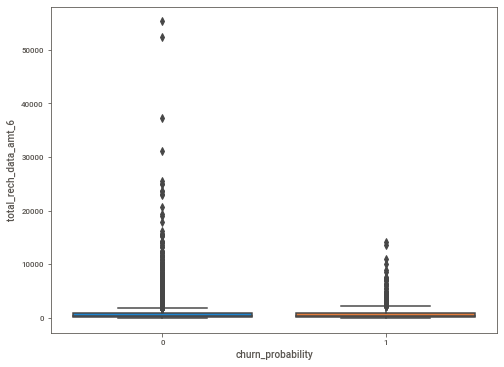

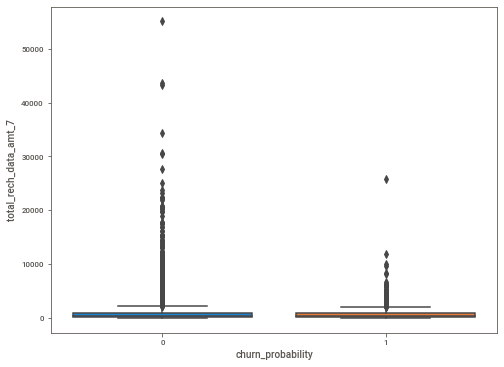

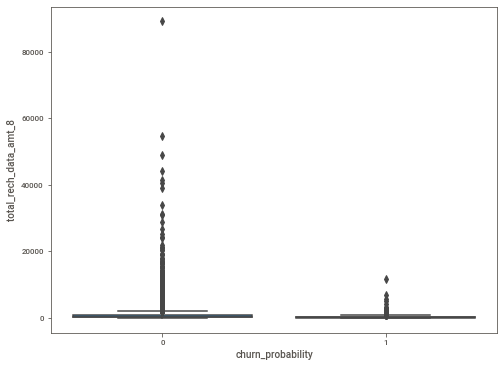

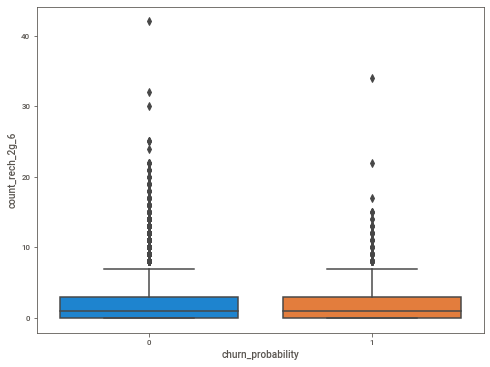

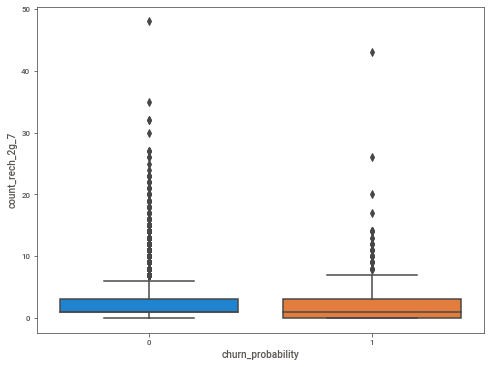

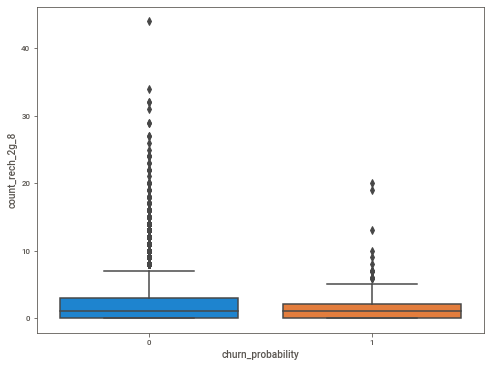

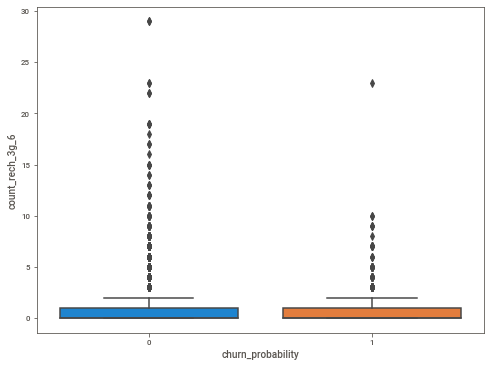

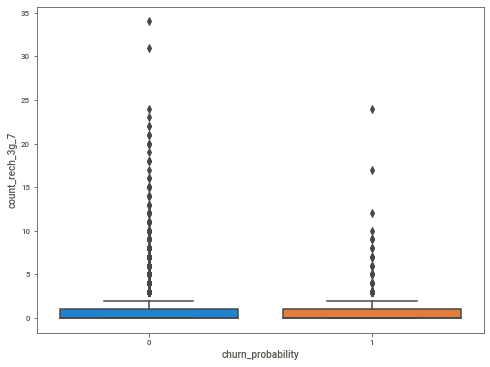

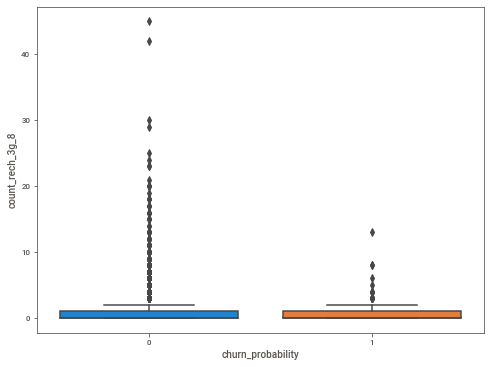

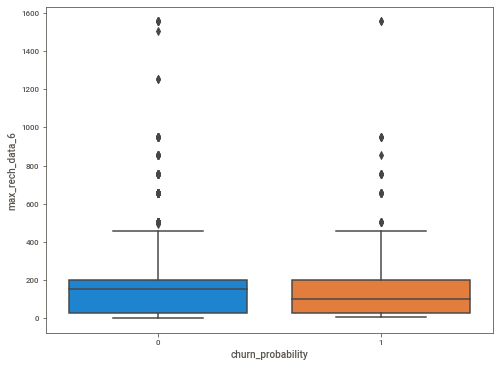

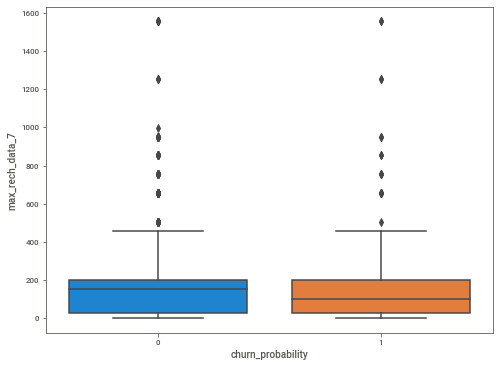

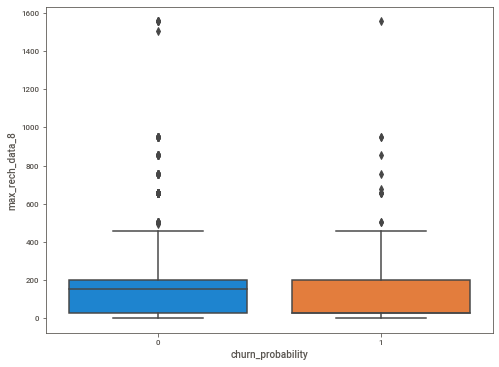

In [211]:
var = 'churn_probability'
for each in recharge_cols:
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y=each, data=churn_hv_cust)
    #fig.axis(ymin=0, ymax=6000);

<b>From above, a pattern is seen that for the customers that churned, the spread and median (in some cases) of Recharge related variables is seen to be slightly decreasing.<b>

In [14]:
# lets check the null values present in the dataset
(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

total_rech_data_amt_8       46.794841
night_pck_user_8            46.794841
max_rech_data_8             46.794841
count_rech_3g_8             46.794841
arpu_3g_8                   46.794841
date_of_last_rech_data_8    46.794841
arpu_2g_8                   46.794841
fb_user_8                   46.794841
count_rech_2g_8             46.794841
fb_user_6                   44.386808
night_pck_user_6            44.386808
count_rech_2g_6             44.386808
max_rech_data_6             44.386808
arpu_2g_6                   44.386808
arpu_3g_6                   44.386808
total_rech_data_amt_6       44.386808
date_of_last_rech_data_6    44.386808
count_rech_3g_6             44.386808
date_of_last_rech_data_7    43.277971
max_rech_data_7             43.277971
count_rech_2g_7             43.277971
arpu_3g_7                   43.277971
arpu_2g_7                   43.277971
night_pck_user_7            43.277971
fb_user_7                   43.277971
total_rech_data_amt_7       43.277971
count_rech_3

In [15]:
# lets check the null values present in the dataset
(churn_test.isnull().sum() * 100 / len(churn_test)).sort_values(ascending = False)

night_pck_user_6            74.716667
count_rech_2g_6             74.716667
arpu_3g_6                   74.716667
total_rech_data_amt_6       74.716667
date_of_last_rech_data_6    74.716667
count_rech_3g_6             74.716667
fb_user_6                   74.716667
arpu_2g_6                   74.716667
max_rech_data_6             74.716667
arpu_3g_7                   74.313333
count_rech_2g_7             74.313333
arpu_2g_7                   74.313333
count_rech_3g_7             74.313333
max_rech_data_7             74.313333
night_pck_user_7            74.313333
date_of_last_rech_data_7    74.313333
fb_user_7                   74.313333
total_rech_data_amt_7       74.313333
count_rech_3g_8             73.593333
date_of_last_rech_data_8    73.593333
count_rech_2g_8             73.593333
total_rech_data_amt_8       73.593333
max_rech_data_8             73.593333
arpu_3g_8                   73.593333
fb_user_8                   73.593333
arpu_2g_8                   73.593333
night_pck_us

It is generally a good practice to ensure that missing values are imputed in the test dataset before using it to evaluate the performance of a machine learning model.

If there are missing values in the test dataset that were not imputed, then the model may not perform well on the test dataset, even if it performed well on the training dataset. This is because the model may not have learned how to handle missing values during training, and it may not be able to make accurate predictions when presented with missing values in the test dataset.

Therefore, while we will impute the missing values in training data set. We'll apply the similar strategy on the test data set as well.

In [16]:
# Drop Columns with > 70% of missing values for training dataset
cols = churn_hv_cust.columns
telecom_null_perc = churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["perc_null"] > 70.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
churn_hv_cust.drop(drop_cols, axis=1,inplace = True)
churn_hv_cust.shape

list of columns dropped: Series([], Name: col_name, dtype: object)


(21013, 156)

No columns were dropped after the above execution.

In [17]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = churn_hv_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

# observation : all the columns below can be converted to date type

date_of_last_rech_6         6/25/2014
date_of_last_rech_7         7/26/2014
date_of_last_rech_8         8/30/2014
date_of_last_rech_data_6    6/25/2014
date_of_last_rech_data_7    7/23/2014
date_of_last_rech_data_8    8/20/2014
Name: 4, dtype: object


In [18]:
# lets check for columns that can be changed to integers, floats or date types for test dataset
object_col_data = churn_test.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

# observation : all the columns below can be converted to date type

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/26/2014
date_of_last_rech_8         8/24/2014
date_of_last_rech_data_6          NaN
date_of_last_rech_data_7          NaN
date_of_last_rech_data_8          NaN
Name: 0, dtype: object


In [19]:
# convert to datetime
for col in object_col_data.columns:
    churn_hv_cust[col] = pd.to_datetime(churn_hv_cust[col])
    churn_test[col] = pd.to_datetime(churn_test[col])

churn_hv_cust.shape
churn_test.shape

(21013, 156)

(30000, 155)

In [20]:
# lets check the correlation amongst the features, drop the highly correlated ones where the coefficient value is greater than 0.6
cor = churn_hv_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

offnet_mou_8           offnet_mou_6        0.600257
aug_vbc_3g             vol_3g_mb_8         0.600696
sachet_3g_8            count_rech_3g_7     0.601632
sachet_2g_8            sachet_2g_6         0.604749
std_ic_mou_8           std_ic_mou_6        0.604869
std_ic_mou_6           std_ic_t2m_mou_7    0.605939
sachet_3g_7            count_rech_3g_8     0.606663
total_ic_mou_7         loc_ic_t2t_mou_7    0.607923
monthly_3g_7           monthly_3g_6        0.608676
night_pck_user_7       night_pck_user_6    0.609340
total_og_mou_7         std_og_mou_6        0.610568
jul_vbc_3g             vol_3g_mb_7         0.612442
std_og_t2m_mou_7       offnet_mou_6        0.612701
std_og_mou_7           offnet_mou_7        0.612916
max_rech_data_8        max_rech_amt_8      0.614304
std_og_mou_7           std_og_t2t_mou_8    0.614556
total_og_mou_6         std_og_t2t_mou_6    0.614563
sachet_2g_6            count_rech_2g_8     0.614693
std_og_mou_8           std_og_mou_6        0.615500
total_ic_mou

#### Plotting a heatmap for variables where the correlation is exceeding the threshold of 0.6

<AxesSubplot:>

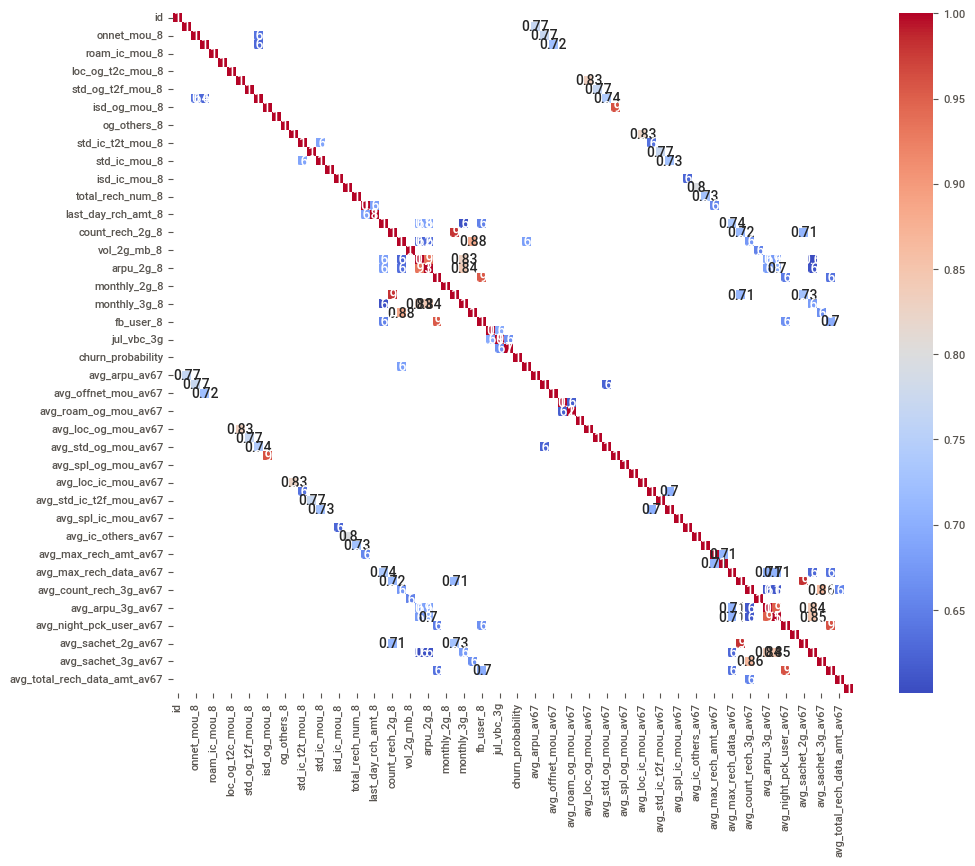

In [189]:
# Calculate the correlation matrix
corr_matrix = churn_hv_cust.corr()

# Create a boolean mask for highly correlated variables
mask = corr_matrix > 0.6

# Filter the correlation matrix using the boolean mask
filtered_corr_matrix = corr_matrix[mask]

f, ax = plt.subplots(figsize=(12, 9))
# Plot the heat map
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()

From above, we noticed that there are couple of variables where correlation is exceeding the threshold of 0.6. Let's analyse further on which of these columns can be dropped and which should be retained to avoid any loss of information.

In [21]:
# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
churn_hv_cust.drop(drop_col_list, axis=1, inplace=True)

#doing the same for test data set to ensure dimensions are same
churn_test.drop(drop_col_list, axis=1, inplace=True)

churn_hv_cust.shape
churn_test.shape

(21013, 114)

(30000, 113)

In [22]:
(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

total_rech_data_amt_8       46.794841
night_pck_user_8            46.794841
max_rech_data_8             46.794841
count_rech_3g_8             46.794841
arpu_3g_8                   46.794841
date_of_last_rech_data_8    46.794841
arpu_2g_8                   46.794841
fb_user_8                   46.794841
count_rech_2g_8             46.794841
fb_user_6                   44.386808
night_pck_user_6            44.386808
count_rech_2g_6             44.386808
max_rech_data_6             44.386808
arpu_2g_6                   44.386808
arpu_3g_6                   44.386808
total_rech_data_amt_6       44.386808
date_of_last_rech_data_6    44.386808
count_rech_3g_6             44.386808
date_of_last_rech_data_7    43.277971
max_rech_data_7             43.277971
count_rech_3g_7             43.277971
count_rech_2g_7             43.277971
arpu_3g_7                   43.277971
arpu_2g_7                   43.277971
night_pck_user_7            43.277971
fb_user_7                   43.277971
total_rech_d

In [23]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [24]:
# impute missing values with 0
churn_hv_cust[zero_impute] = churn_hv_cust[zero_impute].apply(lambda x: x.fillna(0))

#doing the same for test data set
churn_test[zero_impute] = churn_test[zero_impute].apply(lambda x: x.fillna(0))

In [25]:
#creating a list of columns having date related info related info

date_cols = ['date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
             ]


In [26]:
# drop date columns
print("Shape before dropping: ", churn_hv_cust.shape)
churn_hv_cust = churn_hv_cust.drop(date_cols, axis=1)
print("Shape after dropping: ", churn_hv_cust.shape)

Shape before dropping:  (21013, 114)
Shape after dropping:  (21013, 111)


In [27]:
# drop date columns for test data set
print("Shape before dropping: ", churn_test.shape)
churn_test = churn_test.drop(date_cols, axis=1)
print("Shape after dropping: ", churn_test.shape)

Shape before dropping:  (30000, 113)
Shape after dropping:  (30000, 110)


In [28]:
#creating a list of categorical columns
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

# replace missing values with '-1' in categorical columns
churn_hv_cust[cat_cols] = churn_hv_cust[cat_cols].apply(lambda x: x.fillna(-1))

#doing the same for test data set
churn_test[cat_cols] = churn_test[cat_cols].apply(lambda x: x.fillna(-1))

In [29]:
# missing value ratio
(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

arpu_2g_8                46.794841
count_rech_3g_8          46.794841
arpu_3g_8                46.794841
count_rech_2g_8          46.794841
count_rech_3g_6          44.386808
arpu_2g_6                44.386808
count_rech_2g_6          44.386808
arpu_3g_6                44.386808
count_rech_2g_7          43.277971
arpu_3g_7                43.277971
count_rech_3g_7          43.277971
arpu_2g_7                43.277971
loc_og_mou_8              3.911864
std_og_mou_8              3.911864
isd_og_mou_8              3.911864
loc_ic_mou_8              3.911864
spl_ic_mou_8              3.911864
std_og_t2f_mou_8          3.911864
spl_og_mou_8              3.911864
isd_ic_mou_8              3.911864
loc_og_t2c_mou_8          3.911864
ic_others_8               3.911864
std_ic_t2t_mou_8          3.911864
og_others_8               3.911864
roam_og_mou_8             3.911864
std_ic_t2f_mou_8          3.911864
roam_ic_mou_8             3.911864
offnet_mou_8              3.911864
onnet_mou_8         

In [30]:
churn_hv_cust.shape

(21013, 111)

In [31]:
churn_test.shape

(30000, 110)

In [32]:
initial_cols = churn_hv_cust.shape[1]

#setting the missing threshold as 70%. Columns that have missing values more than 70%, will be dropped 
MISSING_THRESHOLD = 0.7

include_cols = list(churn_hv_cust.apply(lambda column: True if column.isnull().sum()/churn_hv_cust.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn_hv_cust.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,id,True
1,arpu_6,True
2,arpu_7,True
3,arpu_8,True
4,onnet_mou_6,True
5,onnet_mou_7,True
6,onnet_mou_8,True
7,offnet_mou_6,True
8,offnet_mou_7,True
9,offnet_mou_8,True


In [33]:
#from the above it is seen that no columns were dropped.
churn_hv_cust.shape

(21013, 111)

In [34]:
# updating the dataframe variable with columns that need to be retained.
churn_hv_cust = churn_hv_cust.loc[:, include_cols]

#dropping the columns where missing values are exceeding the threshold
dropped_cols = churn_hv_cust.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

0 columns dropped.


In [35]:
#filling the remaining missing values with median for columns of float type
for column in churn_hv_cust.select_dtypes(include=['float64']).columns:
    churn_hv_cust[column].fillna(churn_hv_cust[column].median(), inplace=True)
    

In [36]:
#doing the same operation as above for test data set
for column in churn_test.select_dtypes(include=['float64']).columns:
    churn_test[column].fillna(churn_test[column].median(), inplace=True)
    

In [37]:
(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

id                       0.0
count_rech_2g_6          0.0
arpu_3g_8                0.0
arpu_3g_7                0.0
arpu_3g_6                0.0
vol_2g_mb_8              0.0
vol_2g_mb_7              0.0
vol_2g_mb_6              0.0
count_rech_3g_8          0.0
count_rech_3g_7          0.0
count_rech_3g_6          0.0
count_rech_2g_8          0.0
count_rech_2g_7          0.0
max_rech_data_8          0.0
arpu_2g_7                0.0
max_rech_data_7          0.0
max_rech_data_6          0.0
last_day_rch_amt_8       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_6       0.0
max_rech_amt_8           0.0
max_rech_amt_7           0.0
max_rech_amt_6           0.0
total_rech_num_8         0.0
total_rech_num_7         0.0
total_rech_num_6         0.0
arpu_2g_6                0.0
arpu_2g_8                0.0
ic_others_7              0.0
sachet_3g_7              0.0
total_rech_data_amt_7    0.0
total_rech_data_amt_6    0.0
churn_probability        0.0
jun_vbc_3g               0.0
jul_vbc_3g    

In [38]:
(churn_test.isnull().sum() * 100 / len(churn_test)).sort_values(ascending = False)

id                       0.0
max_rech_data_8          0.0
arpu_3g_7                0.0
arpu_3g_6                0.0
vol_2g_mb_8              0.0
vol_2g_mb_7              0.0
vol_2g_mb_6              0.0
count_rech_3g_8          0.0
count_rech_3g_7          0.0
count_rech_3g_6          0.0
count_rech_2g_8          0.0
count_rech_2g_7          0.0
count_rech_2g_6          0.0
max_rech_data_7          0.0
arpu_2g_6                0.0
max_rech_data_6          0.0
last_day_rch_amt_8       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_6       0.0
max_rech_amt_8           0.0
max_rech_amt_7           0.0
max_rech_amt_6           0.0
total_rech_num_8         0.0
total_rech_num_7         0.0
total_rech_num_6         0.0
ic_others_8              0.0
arpu_3g_8                0.0
arpu_2g_7                0.0
arpu_6                   0.0
sachet_3g_6              0.0
total_rech_data_amt_7    0.0
total_rech_data_amt_6    0.0
jun_vbc_3g               0.0
jul_vbc_3g               0.0
aug_vbc_3g    

We now notice that all the missing values are treated correctly for both the training dataset and the test dataset.

In [39]:
churn_hv_cust.shape

(21013, 111)

In [40]:
churn_test.shape

(30000, 110)

# Deriving extra features from the existing columns - Data Preperation

In [41]:
# create a new column, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = churn_hv_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    churn_hv_cust[avg_col_name] = (churn_hv_cust[col_6]  + churn_hv_cust[col_7])/ 2
    
    #doing the same for the test data set
    churn_test[avg_col_name] = (churn_test[col_6]  + churn_test[col_7])/ 2

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2f_mou', 'std_og_mou',
       'isd_og_mou', 'spl_og_mou', 'og_others', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'max_rech_data',
       'count_rech_2g', 'count_rech_3g', 'vol_2g_mb', 'arpu_3g', 'arpu_2g',
       'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'fb_user', 'total_rech_data_amt'],
      dtype='object')

In [42]:
print (churn_hv_cust.shape)

(21013, 146)


In [43]:
churn_test.shape

(30000, 145)

In [44]:
# we dont need columns from which we have derived new features, we will drop these columns
print ("shape after creating derived features",churn_hv_cust.shape)
col_to_drop = churn_hv_cust.filter(regex='_6|_7').columns
churn_hv_cust.drop(col_to_drop, axis=1, inplace=True)

#doing the same for the test datset
churn_test.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping  columns:",churn_hv_cust.shape)
print("dimension of the dataset after dropping  columns for test dataset:",churn_test.shape)

shape after creating derived features (21013, 146)
dimension of the dataset after dropping  columns: (21013, 76)
dimension of the dataset after dropping  columns for test dataset: (30000, 75)


In [45]:
# lets now conevrt AON in months
churn_hv_cust['aon_mon'] = churn_hv_cust['aon']/30
churn_hv_cust.drop('aon', axis=1, inplace=True)
churn_hv_cust['aon_mon'].head()

#doing the same for the test dataset

churn_test['aon_mon'] = churn_test['aon']/30
churn_test.drop('aon', axis=1, inplace=True)
churn_test['aon_mon'].head()

4     21.566667
15    20.066667
23    15.166667
24    40.633333
27    19.100000
Name: aon_mon, dtype: float64

0    56.400000
1    84.433333
2     9.233333
3    41.466667
4    15.400000
Name: aon_mon, dtype: float64

In [46]:
df = churn_hv_cust[:].copy()
df2= churn_test[:].copy()

In [47]:
# divide data into train and test
X = df.drop("churn_probability", axis = 1)
y = df.churn_probability

In [48]:
X.head(5)

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_max_rech_data_av67,avg_count_rech_2g_av67,avg_count_rech_3g_av67,avg_vol_2g_mb_av67,avg_arpu_3g_av67,avg_arpu_2g_av67,avg_night_pck_user_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_fb_user_av67,avg_total_rech_data_amt_av67,aon_mon
4,4,101.565,6.13,9.63,0.0,0.0,0.00,15.76,0.00,0.00,0.0,0.00,0.0,28.31,0.0,0.0,0.00,0.0,0.0,0.0,8,30,30,25.0,6.0,0.0,213.47,0.000,0.00,0.0,0,6,0,0,1.0,0.0,0.00,0.00,852.0,184.4495,13.055,47.550,26.82,7.865,4.925,42.425,0.0,2.175,0.0,8.500,0.00,15.450,0.0,0.000,0.000,0.000,0.0,0.000,11.5,45.5,17.5,33.0,6.5,0.5,349.845,17.5000,17.5600,0.0,0.0,6.5,0.0,0.5,1.0,1281.0,21.566667
15,15,338.286,194.43,197.09,0.0,0.0,0.00,385.26,6.26,6.26,0.0,0.00,0.0,629.94,0.0,0.0,0.00,0.0,0.0,0.0,4,250,250,154.0,1.0,0.0,354.35,0.000,28.80,0.0,1,0,0,0,1.0,0.0,0.00,0.00,154.0,478.9215,17.710,329.450,0.00,0.000,0.000,347.125,0.0,0.000,0.0,0.040,0.05,504.770,0.0,0.515,0.515,0.000,0.0,0.000,4.0,250.0,75.0,77.0,1.0,0.0,130.210,6.7450,94.4700,-0.5,0.5,0.0,0.0,0.0,0.0,77.0,20.066667
23,23,479.762,0.89,386.91,0.0,0.0,0.00,387.79,0.00,0.00,0.0,0.01,0.0,202.89,0.0,0.0,0.00,0.0,0.0,0.4,10,144,30,0.0,1.0,0.0,0.00,9.485,19.63,-1.0,0,0,0,0,-1.0,0.0,0.00,0.00,0.0,1018.2270,616.120,371.785,0.00,0.000,0.000,886.845,0.0,101.040,0.0,0.025,0.00,419.795,0.0,0.000,103.515,0.065,0.0,0.075,22.5,110.0,80.0,0.0,1.0,0.0,0.000,14.9275,25.9575,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,15.166667
24,24,240.449,29.86,222.03,0.0,0.0,0.36,129.73,0.00,121.79,0.0,0.36,0.0,171.01,0.0,0.0,21.93,0.0,0.0,0.0,10,30,30,23.0,1.0,0.0,0.00,0.000,0.00,0.0,0,1,0,0,0.0,0.0,0.00,0.00,23.0,362.0215,65.735,519.475,0.00,0.000,0.000,255.110,0.0,330.100,0.0,0.000,0.00,184.600,0.0,0.000,8.250,0.000,0.0,0.000,7.0,110.0,55.0,23.0,1.5,0.0,0.020,0.0000,0.0500,0.0,0.0,1.5,0.0,0.0,0.0,57.5,40.633333
27,27,421.300,12.68,182.83,0.0,0.0,0.00,195.51,0.00,0.00,0.0,0.00,0.0,350.46,0.4,0.0,0.40,0.0,0.0,0.0,4,164,61,164.0,1.0,2.0,10.54,161.920,161.92,0.0,0,1,1,1,1.0,700.4,185.71,173.72,642.0,370.7370,10.030,145.945,0.00,0.000,0.000,154.710,0.0,1.265,0.0,0.000,0.00,317.035,0.0,7.715,7.715,0.000,0.0,0.000,10.5,177.0,155.0,153.0,2.5,0.5,49.460,82.9500,34.6900,0.0,0.5,2.0,0.0,0.5,1.0,714.0,19.100000


In [49]:
X.shape

(21013, 75)

In [50]:
y.head(5)

4     0
15    0
23    0
24    0
27    0
Name: churn_probability, dtype: int64

In [51]:
y.shape

(21013,)

In [52]:
X2= df2
X2.head()

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_max_rech_data_av67,avg_count_rech_2g_av67,avg_count_rech_3g_av67,avg_vol_2g_mb_av67,avg_arpu_3g_av67,avg_arpu_2g_av67,avg_night_pck_user_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_fb_user_av67,avg_total_rech_data_amt_av67,aon_mon
0,69999,64.445,23.11,34.83,0.00,0.00,0.03,29.43,0.0,28.48,0.0,0.03,0.0,31.51,0.00,0.00,4.34,0.39,0.00,0.00,4,30,0,0.0,1.0,0.0,0.0,0.985,9.6,-1.0,0,0,0,0,-1.0,0.00,0.00,0.00,0.0,78.6060,26.005,46.160,0.000,0.000,0.00,43.860,0.0,28.305,0.0,0.000,0.0,41.485,0.000,0.0,0.700,0.44,0.000,0.0,5.0,40.0,30.0,0.0,1.0,0.0,0.0,0.4125,9.4125,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,56.400000
1,70000,360.868,19.84,394.94,0.00,0.00,0.00,397.11,0.0,17.68,0.8,0.00,0.0,187.43,0.00,0.00,0.00,0.00,94.23,0.00,5,250,0,0.0,1.0,0.0,0.0,0.985,9.6,-1.0,0,0,0,0,-1.0,0.00,0.00,0.00,0.0,464.8680,58.360,548.090,0.000,0.000,0.00,594.575,0.0,11.880,0.0,0.000,0.0,165.465,0.000,0.0,6.255,0.00,146.255,0.0,4.5,250.0,125.0,0.0,1.0,0.0,0.0,0.4125,9.4125,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,84.433333
2,70001,746.239,8.40,45.04,26.08,54.44,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,500,0,0.0,1.0,0.0,0.0,0.985,9.6,-1.0,0,0,0,0,-1.0,525.61,758.41,241.84,0.0,382.3640,7.700,31.395,63.095,39.105,0.00,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.00,0.000,0.0,7.5,400.0,0.0,0.0,1.0,0.0,0.0,0.4125,9.4125,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,9.233333
3,70002,24.400,0.00,24.01,0.00,0.00,0.00,22.86,0.0,0.00,0.0,1.15,0.0,531.64,0.00,0.00,8.83,0.00,8.65,0.00,2,0,0,0.0,1.0,0.0,0.0,0.985,9.6,-1.0,0,0,0,0,-1.0,0.00,0.00,0.00,0.0,107.4700,3.735,122.525,0.000,0.000,3.09,53.435,0.0,66.810,0.0,6.015,0.0,525.460,2.130,0.0,12.885,0.00,0.715,0.0,4.0,130.0,130.0,0.0,1.0,0.0,0.0,0.4125,9.4125,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,41.466667
4,70003,413.329,700.68,74.16,0.00,0.00,0.00,25.51,0.0,749.29,0.0,4.96,0.0,17.61,107.39,1.61,141.48,0.00,0.00,0.16,8,130,130,0.0,1.0,0.0,0.0,0.985,9.6,-1.0,0,0,0,0,-1.0,0.00,0.00,0.00,0.0,356.5715,529.980,42.390,0.000,0.000,0.00,3.140,0.0,569.230,0.0,3.050,1.1,9.860,61.035,0.0,74.960,0.00,0.000,0.0,9.0,110.0,90.0,0.0,1.0,0.0,0.0,0.4125,9.4125,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,15.400000


In [53]:
X2.shape

(30000, 75)

#### Feature Scaling for both Train and Test data set

In [54]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#applying the same scaling that is learned from training data on test data
X2 = scaler.transform(X2)


In [74]:
X2

array([[ 1.73775108, -0.85090093, -0.46154418, ..., -1.21182442,
        -0.40429054,  0.50426245],
       [ 1.73780072, -0.28078975, -0.46859886, ..., -1.21182442,
        -0.40429054,  1.3850668 ],
       [ 1.73785036,  0.46039536, -0.49327946, ..., -1.21182442,
        -0.40429054, -0.97770919],
       ...,
       [ 3.22690252, -0.62828056, -0.46838312, ..., -1.21182442,
        -0.40429054, -0.80699444],
       [ 3.22695216, -0.47971504, -0.45431691, ..., -1.21182442,
        -0.40429054, -0.41948242],
       [ 3.2270018 ,  0.18936546, -0.36834473, ...,  1.02854744,
         1.99120896, -0.80699444]])

In [75]:
## split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (14709, 75)
Dimension of X_test: (6304, 75)


#### Tackling class imbalance

In [76]:
# As discussed earlier, given dataset is skewed, lets balance the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [77]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

Dimension of X_tr Shape: (26892, 75)
Dimension of y_tr Shape: (26892,)
Imbalance in Training dataset: 1.0


### Model Building & Evaluation

In [78]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# lets RFE select 15 most imp features for us
rfe = RFE(estimator=lr, n_features_to_select = 15)   
rfe = rfe.fit(X_tr, y_tr)

In [79]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

#### Logistic Regression & RFE

In [80]:
# lets create a Logisctic Regression model on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [81]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset obtained from the data in train.csv:',lr.score(X_test_rfe, y_test))

[[4891  937]
 [ 100  376]]
Accuracy on the test dataset obtained from the data in train.csv: 0.835501269035533


Lets test the model on the actual test data set present in test.csv file. We'll compare the results in it with the churn probabilities that are present in sample.csv file.

In [82]:
#notice that value of data param is now X2, which was intialised in previous steps
X_test_rfe2 = pd.DataFrame(data=X2).iloc[:, rfe.support_]


In [84]:
#predicting the results on the actual test data
y_pred2 = lr.predict(X_test_rfe2)


In [85]:
actual_result = pd.read_csv("sample.csv")

In [86]:
#creating an empty dataframe
predicted_data=pd.DataFrame()
predicted_data['id']=actual_result['id']
predicted_data['churn_probability']=y_pred2
# writing the dataframe output in a csv file
predicted_data.to_csv('test_output.csv',index=False)

After uploading the results file on Kaggle, the accuracy of 68% was obtained wich is quite less. We'll try different model to obtain greater accuracy on the test results.

In [87]:
# lets check classification report on the test dataset from the train.csv file
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5828
           1       0.29      0.79      0.42       476

    accuracy                           0.84      6304
   macro avg       0.63      0.81      0.66      6304
weighted avg       0.93      0.84      0.87      6304



### Let's try to apply PCA

In [88]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(26892, 75)
(26892,)


In [91]:
## import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
pca.fit(X_tr)

PCA(random_state=100)

In [92]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(26892, 75)
(6304, 75)


#### Logistic Regression & PCA

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#instantiating logistic regression model
lr_pca = LogisticRegression(C=1e9)

#fitting the model on training dataset
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions on the test dataset from train.csv file
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

LogisticRegression(C=1000000000.0)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[5028  800]
 [ 103  373]]
Accuracy of the logistic regression model with PCA:  0.856757614213198


Text(0.5, 0, 'no of principal components')

Text(0, 0.5, 'explained variance - cumulative')

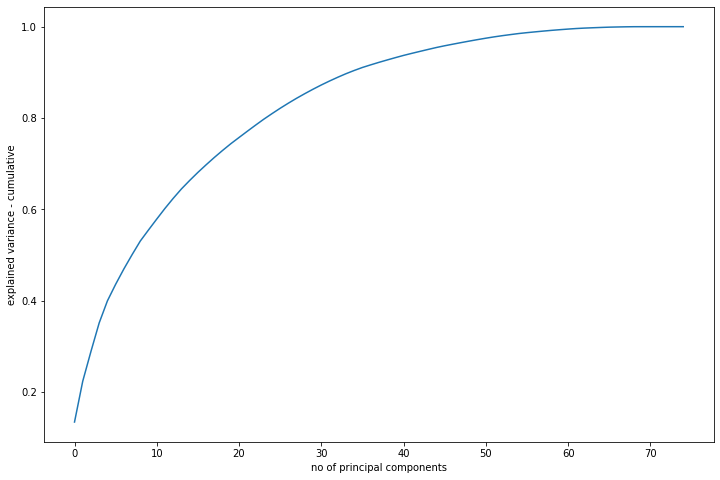

In [95]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [96]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([13.47, 22.41, 28.94, 35.18, 40.  , 43.63, 46.99, 50.12, 53.11,
       55.54, 57.92, 60.25, 62.44, 64.5 , 66.35, 68.11, 69.78, 71.39,
       72.92, 74.39, 75.75, 77.11, 78.45, 79.75, 80.97, 82.15, 83.27,
       84.34, 85.35, 86.32, 87.24, 88.11, 88.93, 89.71, 90.42, 91.08,
       91.65, 92.2 , 92.72, 93.23, 93.72, 94.17, 94.6 , 95.03, 95.45,
       95.83, 96.18, 96.52, 96.85, 97.17, 97.48, 97.77, 98.03, 98.27,
       98.5 , 98.69, 98.86, 99.03, 99.19, 99.33, 99.46, 99.58, 99.67,
       99.74, 99.81, 99.87, 99.91, 99.95, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97])

In [97]:
# PCA with 35 components
pca_35 = PCA(n_components=35)

df_tr_pca_35 = pca_35.fit_transform(X_tr)
print(df_tr_pca_35.shape)

df_test_pca_35 = pca_35.transform(X_test)
print(df_test_pca_35.shape)

(26892, 35)
(6304, 35)


In [98]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_35, y_tr)

# Predicted probabilities
y_pred35 = lr_pca1.predict(df_test_pca_35)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred35)

print("Accuracy with 35 PCAs: ",accuracy_score(y_test,y_pred35))

LogisticRegression(C=1000000000.0)

Accuracy with 35 PCAs:  0.8147208121827412


In [100]:
print(confusion_matrix(y_test,y_pred35))

[[4760 1068]
 [ 100  376]]


<b>Applying the PCA model on the test dataset from test.csv file</b>

In [101]:
df_test_pca_35 = pca_35.transform(X2)
# Predicted probabilities
y_pred35 = lr_pca1.predict(df_test_pca_35)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred35)


In [102]:
#creating an empty dataframe
predicted_data=pd.DataFrame()
predicted_data['id']=actual_result['id']
predicted_data['churn_probability']=df_y_pred
# writing the dataframe output in a csv file
predicted_data.to_csv('test_output.csv',index=False)

<b>After uploading the results file on Kaggle, the accuracy of 71% was obtained wich is less, compared to what we obtained in training data. We'll try different model to obtain greater accuracy on the test results.</b>

### Decision Tree

In [107]:
# Splitting the dataset into train test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(26892, 75)
(26892,)


In [108]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

#instantiating Linear SVC
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(26892, 28)
[ 1  4  5  7  9 11 13 16 17 20 22 24 26 30 34 35 39 40 42 43 47 58 59 60
 66 68 71 74]


In [109]:
# feature vector for decision tree
lasso_features = list(df.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'count_rech_2g_8', 'vol_2g_mb_8', 'monthly_2g_8', 'fb_user_8', 'aug_vbc_3g', 'total_rech_data_amt_8', 'avg_arpu_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_std_og_t2f_mou_av67', 'avg_ic_others_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_arpu_3g_av67', 'avg_night_pck_user_av67', 'avg_monthly_3g_av67', 'avg_total_rech_data_amt_av67']


In [110]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [114]:
# lets see the classification report of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5828
           1       0.33      0.75      0.46       476

    accuracy                           0.86      6304
   macro avg       0.65      0.81      0.69      6304
weighted avg       0.93      0.86      0.89      6304



In [116]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[5092  736]
 [ 118  358]]
Decision Tree - Accuracy : 0.8645304568527918


In [117]:
# Model predictions
X_test2 = pd.DataFrame(data=X2).iloc[:, position]
y_pred2 = dt1.predict(X_test2)

In [122]:
df_y_pred = pd.DataFrame(y_pred2)

In [123]:
#creating an empty dataframe
predicted_data=pd.DataFrame()
predicted_data['id']=actual_result['id']
predicted_data['churn_probability']=df_y_pred
# writing the dataframe output in a csv file
predicted_data.to_csv('test_output.csv',index=False)

### Lets fine tune to find optimal value of Hyperparameters for Decision Tree Model

In [124]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [125]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040454,0.014335,0.001235,0.001079,1,{'max_depth': 1},0.739914,0.749768,0.744701,0.752324,0.754742,0.748290,0.005350,39,0.752894,0.747687,0.748954,0.747048,0.746444,0.748606,0.002300
1,0.059613,0.000690,0.000544,0.000018,2,{'max_depth': 2},0.811861,0.836401,0.833395,0.830792,0.835813,0.829652,0.009114,38,0.835169,0.827918,0.828670,0.829320,0.828065,0.829829,0.002716
2,0.086559,0.000811,0.000586,0.000034,3,{'max_depth': 3},0.828593,0.857966,0.850874,0.855151,0.855337,0.849584,0.010739,37,0.856226,0.847813,0.849679,0.850284,0.848564,0.850513,0.002983
3,0.113145,0.001062,0.000698,0.000121,4,{'max_depth': 4},0.833984,0.862614,0.866865,0.858312,0.863704,0.857096,0.011876,36,0.869893,0.857203,0.860463,0.861904,0.859859,0.861864,0.004294
4,0.137673,0.001385,0.000609,0.000035,5,{'max_depth': 5},0.855178,0.889013,0.885459,0.875604,0.886017,0.878254,0.012389,35,0.889788,0.881699,0.882774,0.881844,0.882263,0.883674,0.003080


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

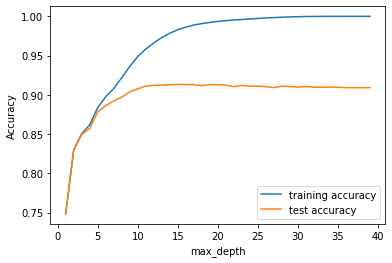

In [126]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# max_depth =10 seems to be the optimal one

In [127]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [128]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.405606,0.014190,0.001143,0.000250,5,{'min_samples_leaf': 5},0.866704,0.917829,0.916698,0.908702,0.916326,0.905252,0.019543,1,0.967229,0.962488,0.964209,0.964721,0.963652,0.964460,0.001571
1,0.313880,0.007417,0.000876,0.000148,25,{'min_samples_leaf': 25},0.870422,0.903700,0.907401,0.897917,0.903868,0.896661,0.013468,2,0.925812,0.917073,0.916473,0.917682,0.918379,0.919084,0.003423
2,0.281657,0.007241,0.000812,0.000043,45,{'min_samples_leaf': 45},0.864659,0.899238,0.901264,0.888248,0.894756,0.889633,0.013262,3,0.913169,0.904709,0.903691,0.904806,0.907037,0.906682,0.003422
3,0.258735,0.004495,0.000758,0.000011,65,{'min_samples_leaf': 65},0.856665,0.897007,0.893083,0.889178,0.891967,0.885580,0.014674,4,0.904709,0.897411,0.896951,0.897137,0.898345,0.898910,0.002939
4,0.244149,0.006850,0.000775,0.000040,85,{'min_samples_leaf': 85},0.854620,0.892917,0.887877,0.883786,0.888806,0.881601,0.013799,5,0.900804,0.892391,0.892628,0.891327,0.895277,0.894485,0.003417


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_sample_leaf')

Text(0, 0.5, 'Accuracy')

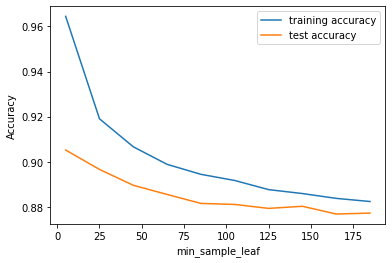

In [129]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [130]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [131]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.440596,0.020468,0.001024,0.000160,5,{'min_samples_split': 5},0.861127,0.916527,0.917813,0.919301,0.917255,0.906405,0.022657,1,0.993864,0.992516,0.992052,0.992888,0.993307,0.992925,0.000626
1,0.429823,0.011833,0.000919,0.000033,25,{'min_samples_split': 25},0.857408,0.913181,0.907772,0.906843,0.912235,0.899488,0.021182,2,0.963975,0.956213,0.959654,0.959003,0.957098,0.959189,0.002698
2,0.425399,0.011172,0.000888,0.000020,45,{'min_samples_split': 45},0.854806,0.905930,0.904425,0.904425,0.911119,0.896141,0.020814,3,0.950077,0.943058,0.941945,0.946314,0.942363,0.944751,0.003074
3,0.421902,0.011037,0.000904,0.000051,65,{'min_samples_split': 65},0.854434,0.905001,0.904239,0.901264,0.911491,0.895286,0.020697,4,0.942314,0.933714,0.932602,0.935530,0.935670,0.935966,0.003375
4,0.418432,0.010851,0.000878,0.000036,85,{'min_samples_split': 85},0.854806,0.901097,0.902752,0.898847,0.905727,0.892646,0.019053,5,0.936085,0.927114,0.925211,0.926234,0.929906,0.928910,0.003913


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

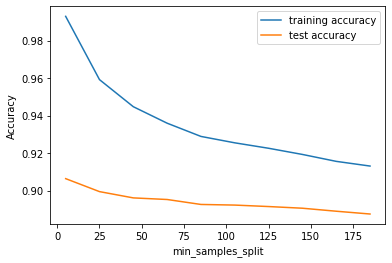

In [132]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_samples_leaf=50 seems to be optimal

In [133]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [134]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.180175,0.012982,0.000831,0.000159,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.850902,0.887526,0.876162,0.871700,0.883414,0.873941,0.012768,19
1,0.176480,0.002688,0.000777,0.000158,entropy,5,25,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.850902,0.887526,0.876162,0.871700,0.883414,0.873941,0.012768,19
2,0.173956,0.001467,0.000659,0.000042,entropy,5,75,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.850158,0.885852,0.876162,0.871885,0.884530,0.873718,0.012873,23
3,0.175386,0.002283,0.000719,0.000101,entropy,5,75,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.850158,0.885852,0.876162,0.871885,0.884530,0.873718,0.012873,23
4,0.172448,0.001426,0.000673,0.000072,entropy,5,125,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.850344,0.885852,0.876906,0.871885,0.884530,0.873903,0.012836,21
5,0.202454,0.059891,0.001222,0.000434,entropy,5,125,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.850344,0.885852,0.876906,0.871885,0.884530,0.873903,0.012836,21
6,0.305525,0.015349,0.001096,0.000190,entropy,10,25,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.871909,0.905001,0.909260,0.896988,0.900335,0.896699,0.013073,1
7,0.285022,0.002110,0.000840,0.000065,entropy,10,25,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.871537,0.903514,0.905727,0.893269,0.897360,0.894281,0.012199,3
8,0.266748,0.001284,0.000905,0.000054,entropy,10,75,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.863172,0.895706,0.897546,0.890666,0.889364,0.887290,0.012437,5
9,0.264002,0.003133,0.000846,0.000064,entropy,10,75,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.861870,0.895706,0.897546,0.890666,0.889364,0.887030,0.012942,6


In [135]:
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8966985157974579


In [136]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25,
                       min_samples_split=50)


In [137]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [138]:
# accuracy score on the test data from train.csv
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8656408629441624


In [139]:
#applying the trained model to predict on the test dataset from test.csv file

y_pred_actual = clf_gini.predict(X_test2)
y_pred_actual

array([0, 0, 1, ..., 1, 0, 0])

In [140]:
df_y_pred = pd.DataFrame(y_pred_actual)

#creating an empty dataframe
predicted_data=pd.DataFrame()
predicted_data['id']=actual_result['id']
predicted_data['churn_probability']=df_y_pred

# writing the dataframe output in a csv file
predicted_data.to_csv('test_output.csv',index=False)

<b>After uploading the results file on Kaggle, the accuracy of 81% was obtained. We'll try different model to obtain greater accuracy on the test results.</b>

### Let's try to apply Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

RandomForestClassifier()

Randon Forest Accuracy with Default Hyperparameter 0.9270304568527918


In [146]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5828
           1       0.51      0.63      0.57       476

    accuracy                           0.93      6304
   macro avg       0.74      0.79      0.76      6304
weighted avg       0.93      0.93      0.93      6304



In [147]:
# Let's Make predictions on the test dataset obtained test.csv file
prediction_test = model_rf.predict(X_test2)

prediction_test

array([0, 0, 1, ..., 1, 0, 0])

In [148]:
df_y_pred = pd.DataFrame(prediction_test)

#creating an empty dataframe
predicted_data=pd.DataFrame()
predicted_data['id']=actual_result['id']
predicted_data['churn_probability']=df_y_pred

# writing the dataframe output in a csv file
predicted_data.to_csv('test_output.csv',index=False)

<b>After uploading the results file on Kaggle, the accuracy of 88.5% was obtained. Let's fine tune the hyperparameters further to obtain greater accuracy.</b>

#### Fine tuning to find optimal Hyperparameters for Random Forest

In [149]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [150]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.867412,0.014814,0.020553,0.000221,2,{'max_depth': 2},0.831939,0.859268,0.856638,0.855151,0.862030,0.853005,0.010791,4,0.857017,0.852740,0.853026,0.850655,0.856140,0.853916,0.002340
1,2.374231,0.104090,0.033906,0.001949,7,{'max_depth': 7},0.886224,0.910950,0.913537,0.910004,0.913537,0.906850,0.010408,3,0.924836,0.916144,0.916287,0.919029,0.916705,0.918600,0.003288
2,3.457789,0.037124,0.045250,0.000451,12,{'max_depth': 12},0.922104,0.952036,0.953700,0.947564,0.950911,0.945263,0.011752,2,0.977177,0.973690,0.972437,0.973877,0.972855,0.974007,0.001671
3,4.087862,0.082173,0.054034,0.001275,17,{'max_depth': 17},0.930099,0.961517,0.963741,0.957605,0.959650,0.954522,0.012379,1,0.992888,0.992563,0.992098,0.992377,0.992842,0.992554,0.000294


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

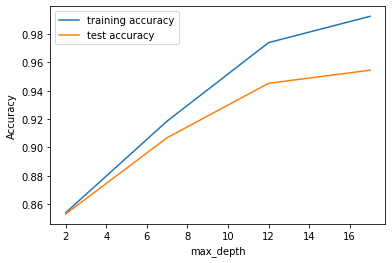

In [151]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [152]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Accuracy')

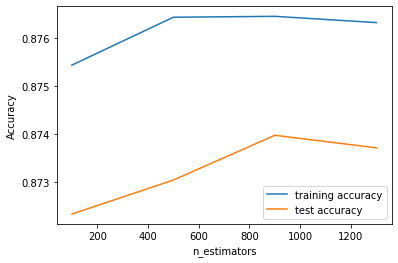

In [153]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [160]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

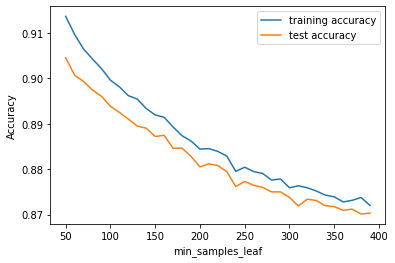

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [168]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

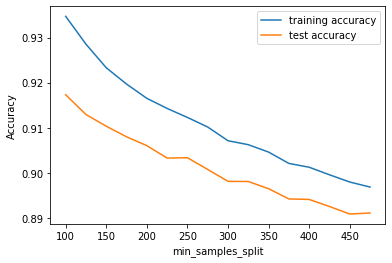

In [169]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [170]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [171]:
# fit the grid search with the data
grid_search.fit(X_lasso, y_tr)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [10, 20, 25],
                         'min_samples_leaf': range(100, 300, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [500, 700]},
             verbose=1)

Accuracy is 0.8929421389260748 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 500}


In [177]:
X_test2.shape

(30000, 28)

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

RandomForestClassifier(max_depth=10, max_features=15, max_leaf_nodes=30,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=50)

In [180]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3868
           1       0.77      0.35      0.48       335

    accuracy                           0.94      4203
   macro avg       0.86      0.67      0.72      4203
weighted avg       0.93      0.94      0.93      4203

[[3834   34]
 [ 219  116]]


In [181]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.939804901261004


In [183]:
# Making predictions on the test data from test.csv file
prediction_test = model_rf.predict(X2)

In [184]:
df_y_pred = pd.DataFrame(prediction_test)

#creating an empty dataframe
predicted_data=pd.DataFrame()
predicted_data['id']=actual_result['id']
predicted_data['churn_probability']=df_y_pred

# writing the dataframe output in a csv file
predicted_data.to_csv('test_output.csv',index=False)

<b>After uploading the results file on Kaggle, the accuracy of 90.326% was obtained, which is the best so far.</b>

<AxesSubplot:>

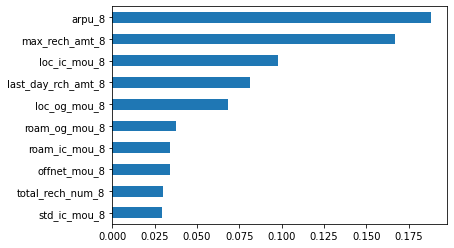

In [186]:
# list of important features
X = df.drop("churn_probability", axis = 1)
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Conclusion

Considering the following points, the Telecom company can devise their strategy to reduce the customer churn rate:
1. Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
2. Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
3. Max Recharge Amount is a strong feature to predict churn.
4. Random Forest produced the best prediction results, out of all the models considered.